In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')

In [3]:
steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')

In [8]:
def rank_graph(name, park, dataframe):
    filt = ((dataframe['Name'] == name) & (dataframe['Park'] == park))
    ax = plt.subplot(1, 1, 1)
    ax.invert_yaxis()
    coaster = dataframe.loc[filt]
    plt.plot(coaster['Year of Rank'], coaster['Rank'])
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.title(name + "'s Ranking by Year")
    plt.show()

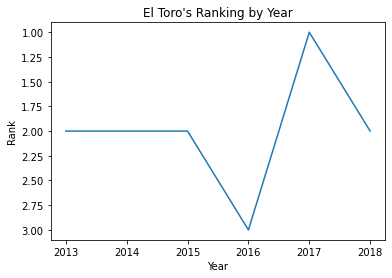

In [9]:
rank_graph('El Toro', 'Six Flags Great Adventure', wood)

In [10]:
def rank_graph2(name1, park1, name2, park2, dataframe):
    filt1 = ((dataframe['Name'] == name1) & (dataframe['Park'] == park1))
    filt2 = ((dataframe['Name'] == name2) & (dataframe['Park'] == park2))
    
    ax = plt.subplot(1, 1, 1)
    ax.invert_yaxis()
    
    coaster1 = dataframe.loc[filt1]
    coaster2 = dataframe.loc[filt2]
    
    plt.plot(coaster1['Year of Rank'], coaster1['Rank'])
    plt.plot(coaster2['Year of Rank'], coaster2['Rank'])
    

    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.title(name1 +"'s & " + name2 + "'s Ranking by Year")
    plt.legend([name1+", "+park1, name2+", "+park2])
    plt.show()

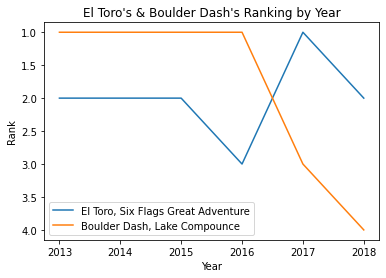

In [11]:
rank_graph2('El Toro', 'Six Flags Great Adventure', 'Boulder Dash', 'Lake Compounce', wood)

In [76]:
def rank_many(n, dataframe):
    top_n_rankings = dataframe[dataframe['Rank'] <= n]
    
    plt.figure(figsize=(10, 8))
    ax = plt.subplot(1,1,1)
    ax.invert_yaxis()
    
    for coaster in set(top_n_rankings['Name']):
        leg_list = []
        #leg_list.append(coaster)
        coaster_rankings = top_n_rankings[top_n_rankings['Name'] == coaster]
        #leg_list.append(coaster_rankings.all())
        ax.plot(coaster_rankings['Year of Rank'], coaster_rankings['Rank'], label=coaster)
        ax.set_yticks([i for i in range(1, n+1)])
    
    #print(leg_list)
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.title("Top "+ str(n) +" Coasters Ranking by Year")
    plt.legend(loc=4)
    plt.show()

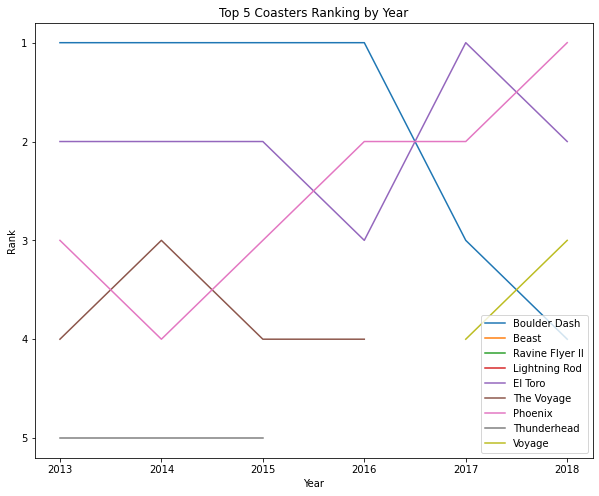

In [77]:
rank_many(5, wood)

In [14]:
stats = pd.read_csv('roller_coasters.csv', na_values = ['na', np.nan, None])

In [17]:
def plot_histogram(column, dataframe):
    dataframe.dropna()
    if dataframe[column].dtype != 'float64':
        print("We can't plot a histogram on that coulumn. Try a numerical column.")
    else:
        plt.hist(dataframe[column])
        plt.legend([column.strip('').replace('_', ' ').title()])

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


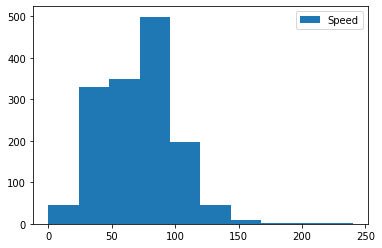

In [57]:
plot_histogram('speed', stats)

In [20]:
def count_inversions(dataframe, park_name):
    park_df = stats[stats['park'] == park_name]
    plt.figure(figsize=(10,8))
    ax = plt.subplot(1, 1, 1)
    plt.bar(park_df['name'], park_df['num_inversions'])
    ax.set_xticklabels(park_df['name'],rotation=90)
    plt.title('Number of Inversions per Roller Coaster at ' + park_name.title())
    plt.show()

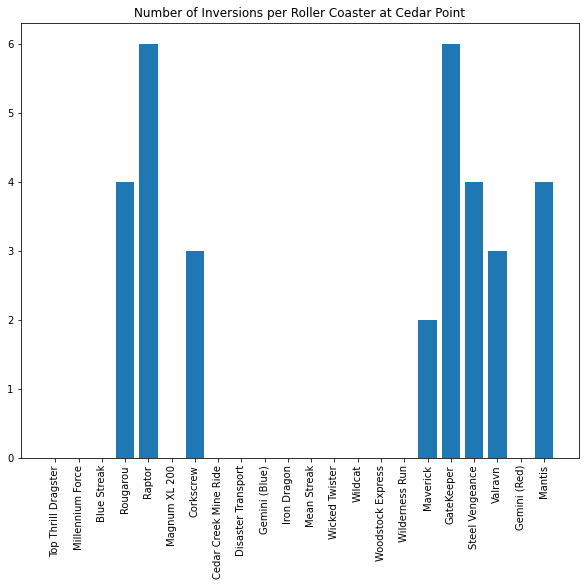

In [25]:
count_inversions(stats, 'Cedar Point')

In [22]:
operating = stats[stats['status'] == 'status.operating']['status'].count()
non_operating = stats[stats['status'] == 'status.closed.definitely']['status'].count()

In [23]:
def operating_pie(dataframe):
    operating = stats[stats['status'] == 'status.operating']['status'].count()
    non_operating = stats[stats['status'] == 'status.closed.definitely']['status'].count()
    slice_labels = ['Operating', 'Non-Operating']
    slices = [operating, non_operating]
    plt.pie(slices, autopct='%0.1f%%')
    plt.axis('equal')
    plt.legend(slice_labels)
    plt.show

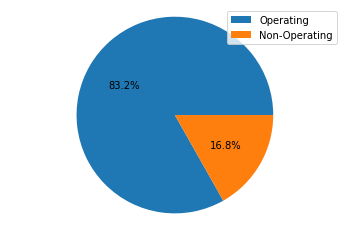

In [24]:
operating_pie(stats)

In [39]:
def scatter(column_1, column_2, dataframe):
        if (dataframe[column_1].dtype != 'float64') or (dataframe[column_2].dtype != 'float64'):
            print("We can't run a scatter plot on those coulumns. Try using two numerical columns.")
        else:
            dataframe.dropna()
            plt.scatter(dataframe[column_1], dataframe[column_2])
            plt.xlabel(column_1.replace('_', ' ').title())
            plt.ylabel(column_2.replace('_', ' ').title())
            plt.title(column_1.replace('_', ' ').title() + " vs. " + column_2.replace('_', ' ').title())
    

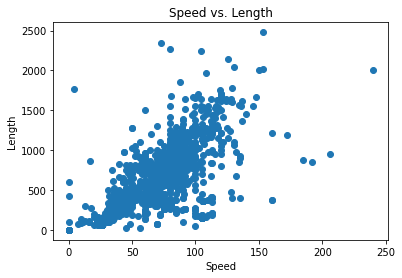

In [44]:
scatter('speed', 'length', stats)

In [49]:
stats['seating_type'].unique()

array(['Sit Down', 'Suspended', 'Inverted', 'Spinning', 'Water Coaster',
       'Floorless', 'Bobsleigh', 'Stand Up', 'Flying', '4th Dimension',
       'Pipeline', 'Motorbike', 'Wing', 'Alpine', nan], dtype=object)

In [54]:
seattype = pd.value_counts(stats['seating_type'].values, sort=True)
print(seattype)

Sit Down         2217
Spinning          150
Inverted          122
Suspended          55
Alpine             43
Water Coaster      29
Floorless          27
Flying             27
Motorbike          21
Stand Up           20
4th Dimension      18
Wing               17
Bobsleigh          11
Pipeline            5
dtype: int64


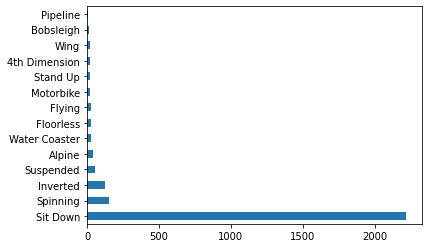

In [56]:
seattype.plot.barh()

https://github.com/Goananda/Codecademy-project-Roller-Coaster/blob/master/Roller%20Coaster.ipynb

Here is some good code to reference for this project.